In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

In [5]:
df.rename(columns={'v1':'target', 'v2':'sms'}, inplace=True)
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.duplicated().sum()

403

In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df.isna().sum()

target    0
sms       0
dtype: int64

In [10]:
df.loc[df.target=='ham', 'target'] = 0
df.loc[df.target=='spam', 'target'] = 1

In [11]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.shape

(5169, 2)

In [13]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA

<Axes: ylabel='count'>

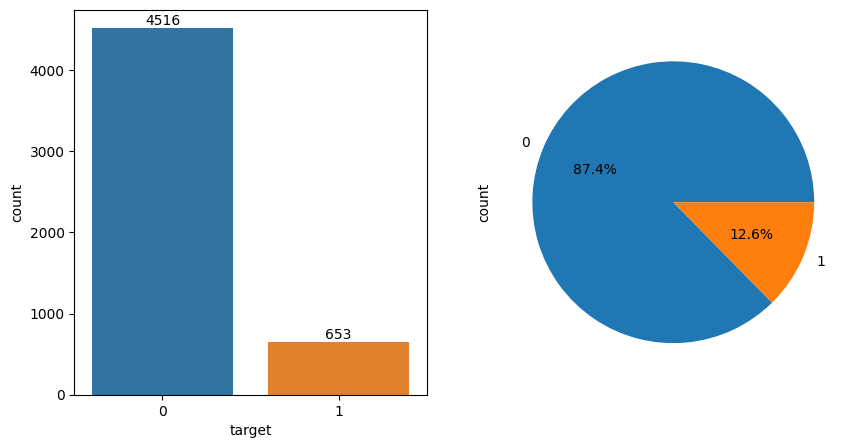

In [14]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
plot1 = sns.countplot(df, x='target', ax=ax[0])
# show count number above the bins
for container in plot1.containers:
    plot1.bar_label(container)
    
df.target.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])

**Observations:**
* 87.4% of the SMSes aren't spam while only 12.6% is actually spam
    
**Insights:**
* since the data is imbalanced we need to take that into consideration while splitting the training and testing set

In [15]:
"""
Punkt Sentence Tokenizer

This tokenizer divides a text into a list of sentences
by using an unsupervised algorithm to build a model for abbreviation
words, collocations, and words that start sentences
"""
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Feature Engineering

### number of sentences

In [16]:
df['sentences_count'] = df['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))

### number of words

In [17]:
df['words_count'] = df['sms'].apply(lambda x: len(nltk.word_tokenize(x)))

### number of characters

In [18]:
df['characters_count'] = df['sms'].apply(len)

In [19]:
df.head()

,target,sms,sentences_count,words_count,characters_count
0,0,"Go until jurong point, crazy.. Available only ...",2,23,111
1,0,Ok lar... Joking wif u oni...,2,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,155
3,0,U dun say so early hor... U c already then say...,1,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,61


In [20]:
df[df.target==1].describe()

,sentences_count,words_count,characters_count
count,653.000000,653.000000,653.000000
mean,2.969372,27.474732,137.891271
std,1.488910,6.893007,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,9.000000,44.000000,224.000000


In [21]:
df[df.target==0].describe()

,sentences_count,words_count,characters_count
count,4516.000000,4516.000000,4516.000000
mean,1.815545,16.957484,70.459256
std,1.364098,13.394052,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,219.000000,910.000000


spam SMSses have on average more sentences/words count than ham ones, but these have some outliers that surpass the spammy SMSses

<Axes: xlabel='characters_count', ylabel='Count'>

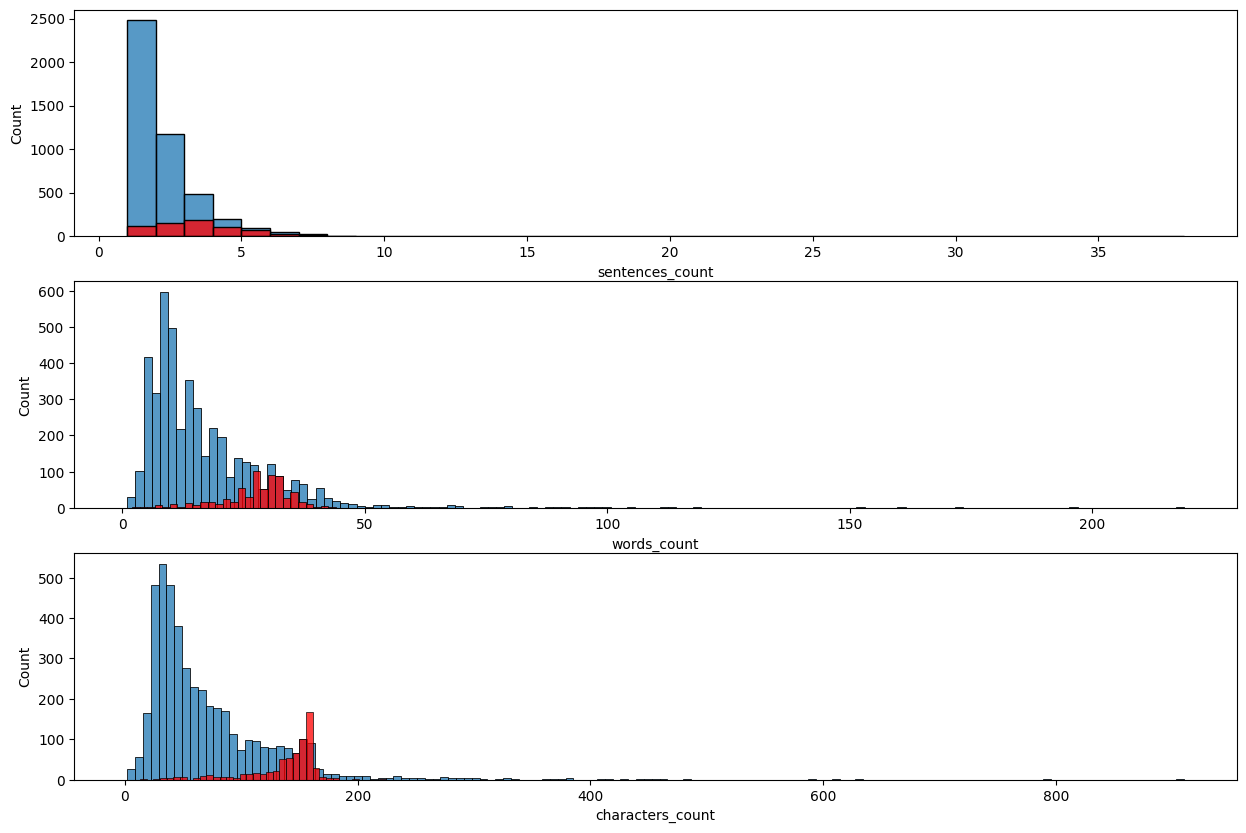

In [22]:
_, ax=plt.subplots(3,1,figsize=(15,10))

sns.histplot(df[df.target==0]['sentences_count'], ax=ax[0], binwidth=1)
sns.histplot(df[df.target==1]['sentences_count'], color='red', ax=ax[0], binwidth=1)

sns.histplot(df[df.target==0]['words_count'], ax=ax[1])
sns.histplot(df[df.target==1]['words_count'], color='red', ax=ax[1])

sns.histplot(df[df.target==0]['characters_count'], ax=ax[2])
sns.histplot(df[df.target==1]['characters_count'], color='red', ax=ax[2])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


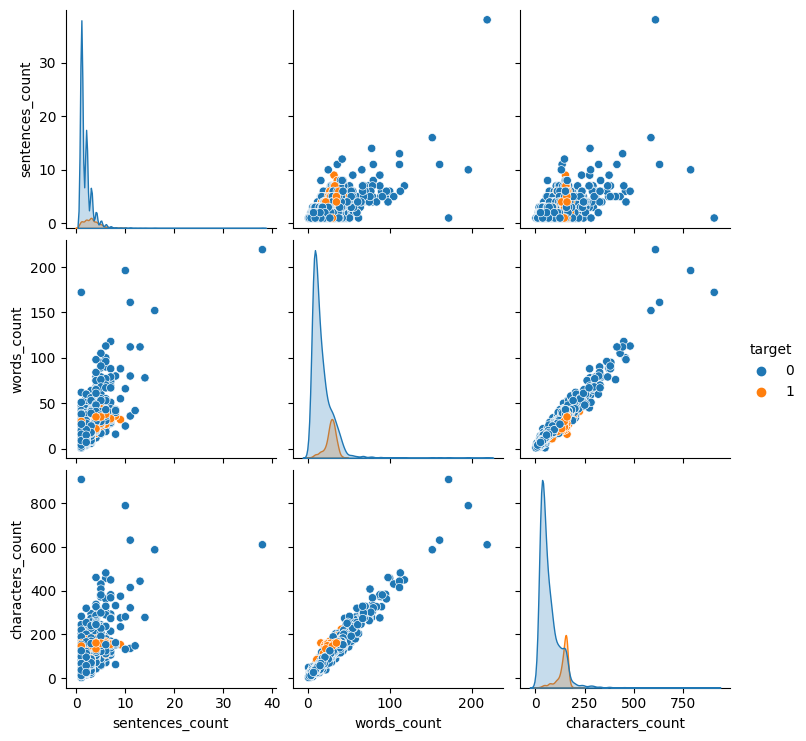

In [23]:
sns.pairplot(df, hue='target')

# Data Preprocessing

## Text Preprocessing

**TODO:**
* Lower text
* Tokenization: *for example transform 'how are you' into -> ['how', 'are', 'you']*
* Remove special characters
* Remove stop words (the, is, are...etc) & punctuation
* Stemming: *for example transform cretive, creating, created, creating into -> create*

In [24]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [25]:
def preprocess_text(text):
    # lower text
    text = text.lower()
    
    # tokenization
    text = nltk.word_tokenize(text)
    
    # remove special characters
    text = [i for i in text if i.isalnum()]
    
    # remove stop words & punctuation
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]
    
    # stemming
    ps = PorterStemmer()
    text = [ps.stem(i) for i in text]
    
    return " ".join(text)

In [26]:
df['text_transformed'] = df['sms'].apply(preprocess_text)

Now let's do something cool!

In [27]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=1000, background_color='white', min_font_size=15)

In [28]:
wc_spam = wc.generate(df[df.target == 1]['text_transformed'].str.cat(sep=' '))

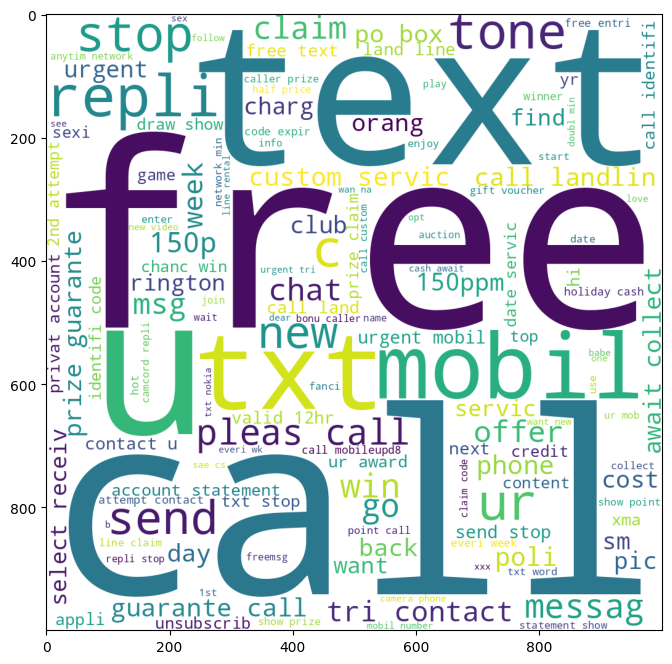

In [29]:
plt.figure(figsize=(8,8))
plt.imshow(wc_spam)

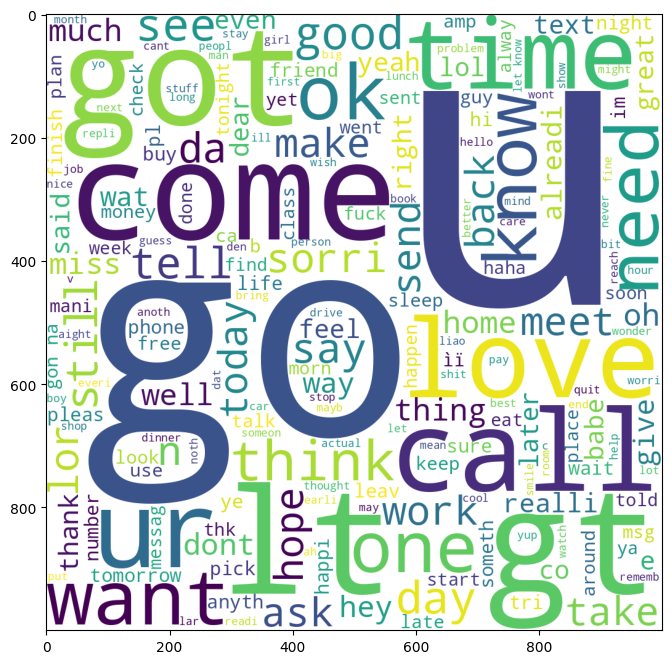

In [30]:
wc_ham = wc.generate(df[df.target == 0]['text_transformed'].str.cat(sep=' '))
plt.figure(figsize=(8,8))
plt.imshow(wc_ham)

# Modeling

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

**CountVectorizer:**

* **Purpose:** CountVectorizer is a simple method for converting a collection of text documents to a matrix of token counts. It focuses on the frequency of words in a document and doesn't consider the importance of words in the entire corpus.
* **How it works:** It builds a vocabulary of all unique words in the text corpus and then represents each document as a vector where each element corresponds to the count of a word's occurrence in that document.

In [48]:
X = cv.fit_transform(df['text_transformed']).toarray()

In [49]:
X.shape

(5169, 6629)

In [50]:
y = df['target'].values

In [51]:
from sklearn.model_selection import train_test_split

# remember before that our dataset is not balanced that's why we use stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [52]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

in this classification problem where we need predict weather a sms is a spam or not in this example the worst scenario is to classify an email as spam knowing that is not spam that’s why we need to decrease FP (false positive) → that’s why we need to use PRECISION

In [112]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [54]:
def test_models(models):
    
    scores = {'model': [],
             'accracy score': [],
             'precision score': []}

    _, ax = plt.subplots(1, len(models), figsize=(20,5))

    for index, model in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        scores['model'].append(type(model).__name__)
        scores['accracy score'].append(accuracy)
        scores['precision score'].append(precision)

        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax[index], fmt=".0f")
        ax[index].set_title(type(model).__name__)

    scores = pd.DataFrame(scores)
    return scores

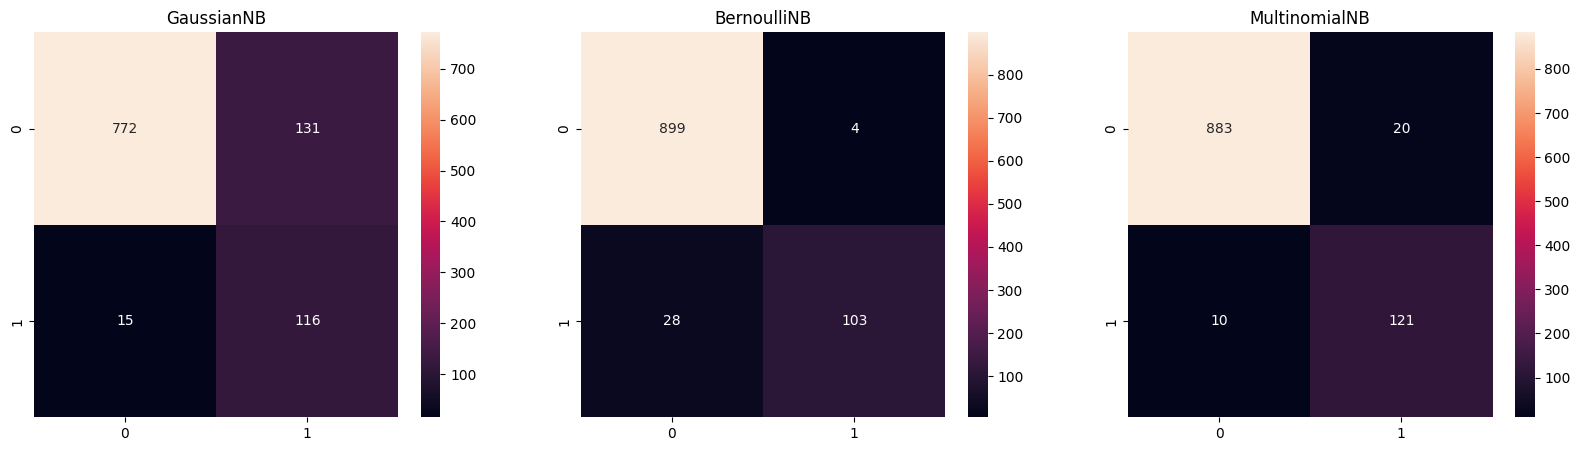

In [55]:
models = [
    GaussianNB(),
    BernoulliNB(),
    MultinomialNB(),
]
scores = test_models(models)

**TfidfVectorizer (Term Frequency-Inverse Document Frequency):**

* **Purpose:** TfidfVectorizer is designed to address the issue of word importance. It considers not only the frequency of words in a document but also how unique they are across the entire corpus. Words that are common in many documents receive lower weights, while words that are unique to a document receive higher weights.
* **How it works:** It computes a TF-IDF score for each term in each document. TF (Term Frequency) measures the frequency of a term in a document, while IDF (Inverse Document Frequency) measures the uniqueness of the term across the entire corpus.

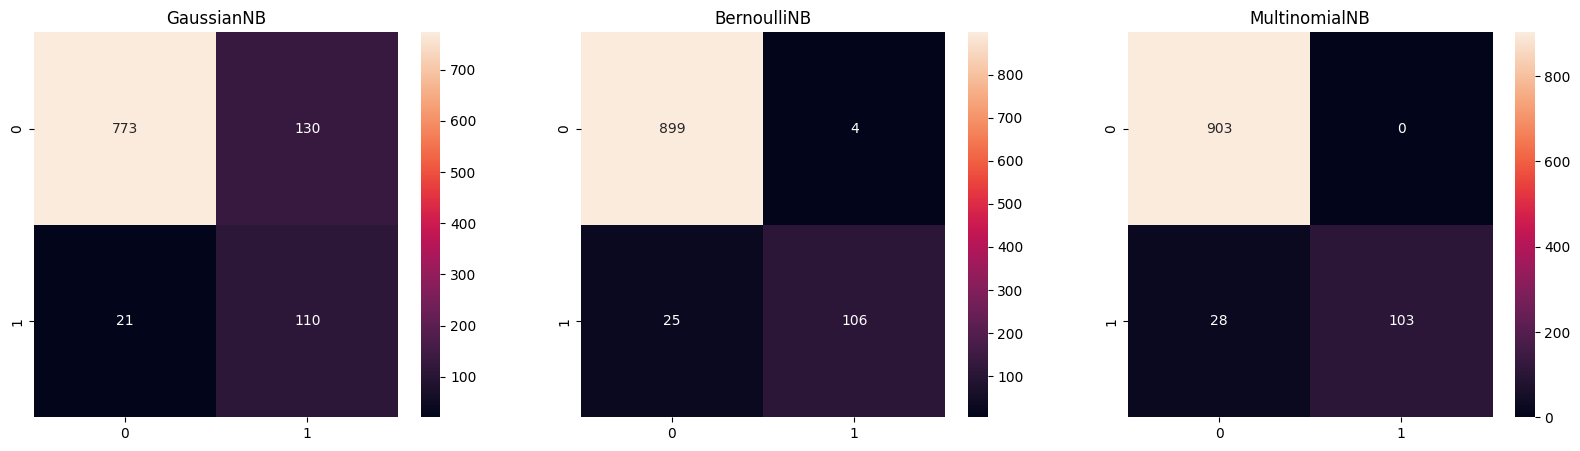

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
"""
If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus. Otherwise, all features are used.
for 4000 it's an experimental value that gaves us good results 
"""
tfidf = TfidfVectorizer(max_features=4000)
X = tfidf.fit_transform(df['text_transformed']).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

models = [
    GaussianNB(),
    BernoulliNB(),
    MultinomialNB(),
]
scores = test_models(models)

In [94]:
scores

,model,accracy score,precision score
0,GaussianNB,0.853965,0.458333
1,BernoulliNB,0.971954,0.963636
2,MultinomialNB,0.972921,1.000000


Awsome, the MultinomialNB have a precision of 1 and it seems it's the best performing models among the other, let's try other models

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [96]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SCV": SVC(),
    "KNN": KNeighborsClassifier(),
    "MNB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=60, n_jobs=-1),
    "Extra Trees": ExtraTreesClassifier(n_estimators=60, n_jobs=-1),
    # long training time
    #"Ada Boost": AdaBoostClassifier(n_estimators=60),
    #"Bagging clf": BaggingClassifier(n_estimators=60, n_jobs=-1),
    #"Gradient Boosting": GradientBoostingClassifier(n_estimators=60),
    #"XGB": XGBClassifier(n_estimators=60),
}

In [97]:
def train_clf(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [98]:
import time

accuracy_scores = []
precision_scores = []

for key, model in models.items():
    start = time.time()
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    stop = time.time()
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print(f'Model: {key}, ' +
         f'accuracy: {np.round(accuracy, 2)}, ' +
         f'precision: {np.round(precision, 2)}, ' + 
         f'training time(s): {np.round((stop - start), 2)}')

Model: Logistic Regression, accuracy: 0.95, precision: 0.98, training time(s): 0.96
Model: SCV, accuracy: 0.97, precision: 0.99, training time(s): 48.09
Model: KNN, accuracy: 0.92, precision: 1.0, training time(s): 0.69
Model: MNB, accuracy: 0.97, precision: 1.0, training time(s): 0.07
Model: Decision Tree, accuracy: 0.93, precision: 0.78, training time(s): 1.14
Model: Random Forest, accuracy: 0.97, precision: 1.0, training time(s): 4.47
Model: Extra Trees, accuracy: 0.97, precision: 0.98, training time(s): 13.11


In [99]:
benchmark_df = pd.DataFrame({'Classifier': models.keys(),
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores})

In [100]:
benchmark_df.sort_values(by='Precision', ascending=False)

,Classifier,Accuracy,Precision
2,KNN,0.917795,1.000000
3,MNB,0.972921,1.000000
5,Random Forest,0.969052,1.000000
1,SCV,0.970986,0.990291
6,Extra Trees,0.974855,0.981651
0,Logistic Regression,0.952611,0.976744
4,Decision Tree,0.926499,0.777778


Let's preform hyperparameter tuning for the top 3 models

In [105]:
best_models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "MNB": MultinomialNB(),
    "KNN": KNeighborsClassifier(n_jobs=-1),
}
grid = {
    "Random Forest": {
                    "n_estimators": [50, 100, 150, 200],
                    "max_depth": [None, 5, 10, 20, 30],
                    "min_samples_split": [2, 5, 10]
                    },
    "MNB": {
        "alpha": [0.1, 0.5, 1.0]
          },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
            }
}

In [107]:
# create validation set to avoid trying to find hyper parameters based on testing data that might lead us to overfitting

X_train_, X_valid, y_train_, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=100, stratify=y_train)
y_train_ = y_train_.astype(int)
y_valid = y_valid.astype(int)

In [116]:
from sklearn.model_selection import GridSearchCV

model_best_params = best_models.copy()

for key, model in best_models.items():
    start = time.time()
    
    # cv>1 takes long time
    grid_search = GridSearchCV(estimator=model, param_grid=grid[key], cv=None, n_jobs=-1, scoring='f1')
    grid_search.fit(X_train_, y_train_)
    
    stop = time.time()
    training_time = np.round((stop-start), 2)
    model_best_params[key] = grid_search.best_params_
    
    print(f'Model: {key}, '+
          f'score: {grid_search.score(X_valid, y_valid)}'
          f'training time(s): {training_time}')

Model: Random Forest, score: 0.8287292817679558training time(s): 684.0
Model: MNB, score: 0.8775510204081632training time(s): 1.04
Model: KNN, score: 0.5655172413793104training time(s): 8.83


In [117]:
model_best_params

{'Random Forest': {'max_depth': None,
  'min_samples_split': 5,
  'n_estimators': 150},
 'MNB': {'alpha': 0.1},
 'KNN': {'n_neighbors': 3, 'weights': 'distance'}}

In [122]:
best_models = {
    "Random Forest": RandomForestClassifier(**model_best_params['Random Forest'], n_jobs=-1),
    "MNB": MultinomialNB(**model_best_params['MNB']),
    "KNN": KNeighborsClassifier(**model_best_params['KNN'], n_jobs=-1),
}

In [123]:
accuracy_scores = []
precision_scores = []

for key, model in best_models.items():
    
    accuracy, precision = train_clf(model, X_train, y_train, X_test, y_test)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print(f'Model: {key}, ' +
         f'accuracy: {np.round(accuracy, 2)}, ' +
         f'precision: {np.round(precision, 2)}, ')
    
temp_df = pd.DataFrame({'Classifier': best_models.keys(),
                            'Accuracy': accuracy_scores,
                            'Precision': precision_scores})

Model: Random Forest, accuracy: 0.97, precision: 1.0, 
Model: MNB, accuracy: 0.98, precision: 0.97, 
Model: KNN, accuracy: 0.94, precision: 1.0, 


In [124]:
temp_df

,Classifier,Accuracy,Precision
0,Random Forest,0.972921,1.00000
1,MNB,0.984526,0.96748
2,KNN,0.939072,1.00000


In [125]:
benchmark_df

,Classifier,Accuracy,Precision
0,Logistic Regression,0.952611,0.976744
1,SCV,0.970986,0.990291
2,KNN,0.917795,1.000000
3,MNB,0.972921,1.000000
4,Decision Tree,0.926499,0.777778
5,Random Forest,0.969052,1.000000
6,Extra Trees,0.974855,0.981651


Well, there a noticeable improvement when it comes to accuracy for both RF & KNN where we see a decrease in precision for MNB so we are going to keep it without tuning

In [128]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('RF', RandomForestClassifier(**model_best_params['Random Forest'])),
    ('MNB', MultinomialNB()),
    ('KNN', KNeighborsClassifier(**model_best_params['KNN']))
], voting='soft', n_jobs=-1)

In [129]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(min_samples_split=5,
                                                     n_estimators=150)),
                             ('MNB', MultinomialNB()),
                             ('KNN',
                              KNeighborsClassifier(n_neighbors=3,
                                                   weights='distance'))],
                 n_jobs=-1, voting='soft')

In [130]:
y_pred = voting.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')

accuracy: 0.971953578336557
precision: 1.0


these scores are similar to MNB so we'll stick with it